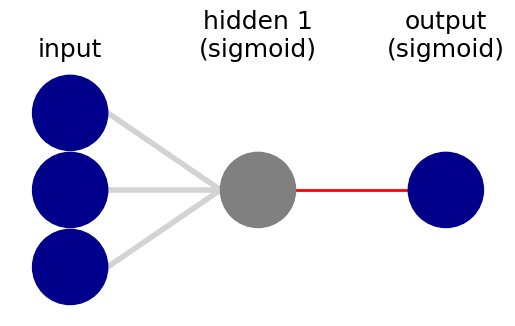

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [2]:
from nnv import NNV

layersList = [
    {"title":"input", "units": 3, "color": "darkBlue"},
    {"title":"hidden 1\n(sigmoid)", "units": 1, "edges_color":"red", "edges_width":2},
    {"title":"output\n(sigmoid)", "units": 1,"color": "darkBlue"},
]

NNV(layersList).render()

Text(0, 0.5, 'sigmoid(x)')

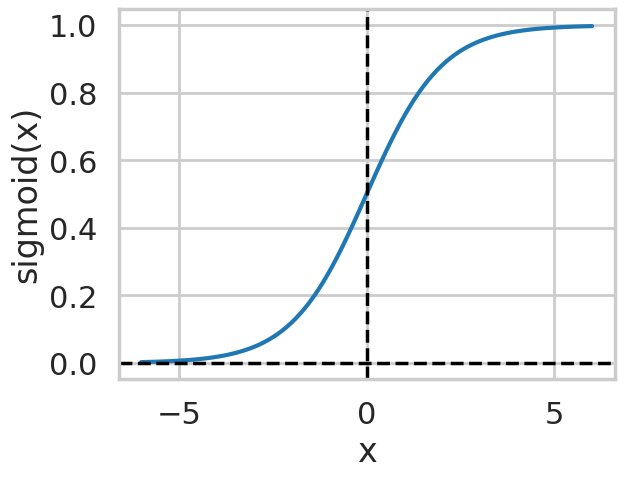

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context('poster')
sns.set_style("whitegrid")

def sigmoid(x) :
    return 1.0/(1 + np.exp(-x)) #Funcion de activacion

xdata = np.linspace(-6.0, 6.0, 100)
plt.plot(xdata, sigmoid(xdata))
# Highlight x=0 and y=0 axes
plt.axhline(0, color='black', linestyle='--', linewidth=2.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=2.5)  # Vertical line at x=0
# Add labels to the x-axis and y-axis
plt.xlabel("x")
plt.ylabel(rf"sigmoid(x)")

In [12]:
import numpy as np

def sigmoid(x) :
    return 1.0/(1 + np.exp(-x)) 

def get_training_inputs(): #datos de entrenamiento de entrada 
    return np.array([[0, 0, 1],
                     [1, 1, 1], 
                     [1, 0, 1],
                     [0, 1, 1]])

def get_training_outputs(): #datos de entrenamiento de salida 
    return np.array([0, 0, 1, 1]).reshape(4, 1) #¿porque el reshape 4,1 ? para verticalizar los datos

def get_init_weights():
    """
    Initially, simply return random weights in [-1, 1)
    """
    return np.random.uniform(-1.0, 1.0, size=(3, 1)) #¿porque -1 y 1? porque es razonable pero no hay razon teorico (probar cambiandolo)

def training_one_step(training_inputs, training_outputs, initial_weights):
    # Forward pass
    # iter only once
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, initial_weights))
    return outputs

In [13]:
np.random.seed(1) # what happens if you comment this?
inputs_t = get_training_inputs()
outputs_t = get_training_outputs()
weights = get_init_weights()
print(inputs_t)
print(outputs_t)
print(weights)

[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
[[0]
 [0]
 [1]
 [1]]
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [14]:
outputs = training_one_step(inputs_t, outputs_t, weights)
print("Training outputs:")
print(outputs_t)
print("Results after one step training:")
print(outputs)

Training outputs:
[[0]
 [0]
 [1]
 [1]]
Results after one step training:
[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]]


In [15]:
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def train_nn(training_inputs, training_outputs, initial_weights, niter, errors_data, alpha = 1.0):
    """
    training_inputs: asdasdasda
    ...
    errors_data: output - stores the errors per iteration
    """
    w = initial_weights
    for ii in range(niter):
        # Forward propagation
        input_layer = training_inputs
        outputs = sigmoid(np.dot(input_layer, w))
        # Backward propagation
        errors = outputs - training_outputs
        deltaw = errors*sigmoid_prime(outputs)
        deltaw = np.dot(input_layer.T, deltaw)
        w = w - alpha*deltaw
        # Save errors for plotting later
        errors_data[ii] = errors.reshape((4,))
    return outputs, w

In [16]:
np.random.seed(1) # what happens if you comment this?
inputs_t = get_training_inputs()
outputs_t = get_training_outputs()
weights = get_init_weights()

In [17]:
NITER = 5000
errors = np.zeros((NITER, 4))
outputs, weights = train_nn(inputs_t, outputs_t, weights, NITER, errors, alpha=0.9)
print("Training outputs:")
print(outputs_t)
print("Results after training:")
print(outputs)
print(weights)

Training outputs:
[[0]
 [0]
 [1]
 [1]]
Results after training:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
[[ 3.54488502e-16]
 [ 3.50500287e-16]
 [-5.54226675e-16]]


Text(0.5, 0, 'Epoch')

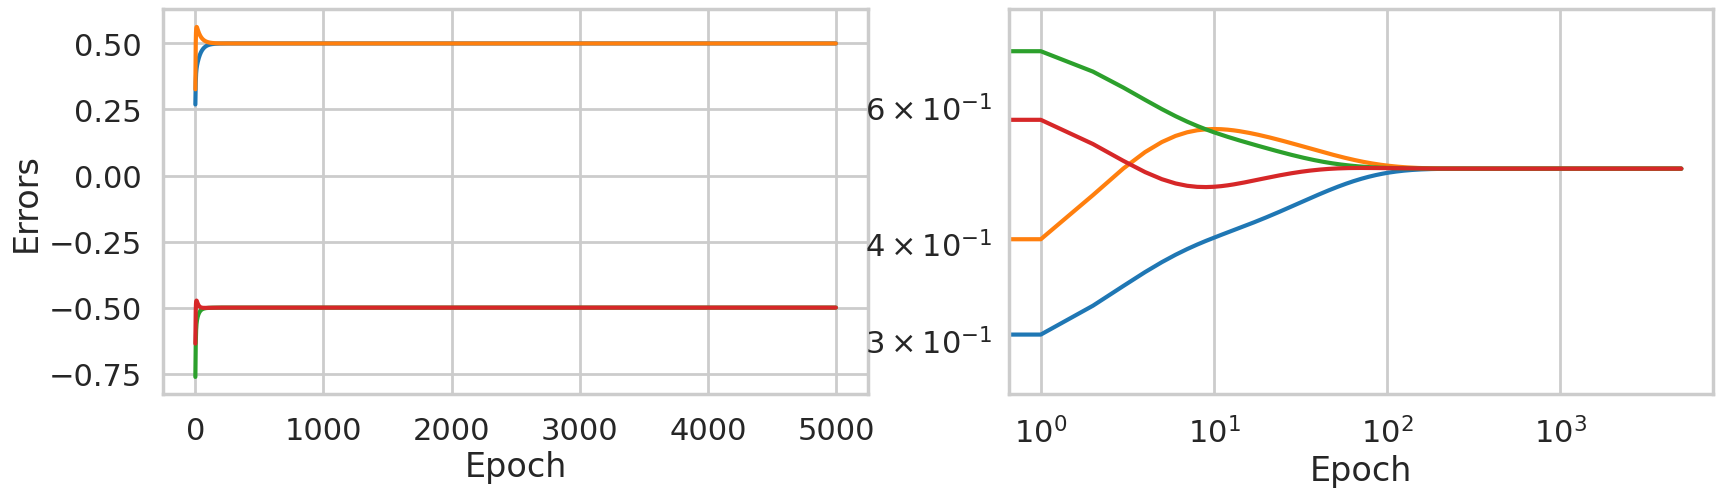

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(range(NITER), errors)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Errors")
ax[1].loglog(range(NITER), np.abs(errors))
ax[1].set_xlabel("Epoch")

In [19]:
#print(weights)
#print(weights.shape)
input_new = np.array([1, 0, 0]).reshape(3, 1)
#print(input_new)
#print(input_new.shape)
#print(np.sum(weights*input_new))
print(sigmoid(np.sum(weights*input_new)))

0.5000000000000001
